In [1]:
# Import data & libraries #
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
###Python shortcut to folder path###
path = r'C:\Users\hazem\01-2023 Instacart Basket Analysis - Master Folder'

In [3]:
df_instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_merged.pkl'))

# Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample

In [4]:
# Creating exclusion flag #
df_instacart.loc[df_instacart['max_order'] < 5, 'exclusion flag'] = 'low-activity'
df_instacart.loc[df_instacart['max_order'] >= 5, 'exclusion flag'] = 'high-activity'

In [5]:
df_instacart['exclusion flag'].value_counts()

high-activity    30964564
low-activity      1440295
Name: exclusion flag, dtype: int64

In [6]:
# Excluding low activiy custumers from the dataset #
df_instacart = df_instacart.loc[df_instacart['exclusion flag'] == 'high-activity']

In [7]:
df_instacart.shape

(30964564, 32)

In [8]:
# Export data frame excluding low activity customers
df_instacart.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_customers.pkl'))

# (5) Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents

#Create customer_profile column#

In [9]:
df_instacart.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'busiest_day', 'busy_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_of_prior_orders', 'order_frequency_flag',
       'Gender', 'State', 'Age', 'date_joined', 'dependants', 'Annual_income',
       'region', 'exclusion flag'],
      dtype='object')

In [10]:
# creating profile for big family with low income (below $100,000)
df_instacart.loc[(df_instacart['dependants'] == 3) & (df_instacart['Annual_income'] < 100000), 'customer_profile'] = 'big family_low income'

In [11]:
# creating profile for medium family with low income (below $100,000)
df_instacart.loc[(df_instacart['dependants'] == 2) & (df_instacart['Annual_income'] < 100000), 'customer_profile'] = 'medium family_low income'

In [12]:
# creating profile for small family with low income (below $100,000)
df_instacart.loc[(df_instacart['dependants'] == 1) & (df_instacart['Annual_income'] < 100000), 'customer_profile'] = 'small family_low income'

In [13]:
# creating profile for big family with high income (over $100,000)
df_instacart.loc[(df_instacart['dependants'] == 3) & (df_instacart['Annual_income'] > 100000), 'customer_profile'] = 'big family_high income'

In [14]:
# creating profile for medium family with high income (over $100,000)
df_instacart.loc[(df_instacart['dependants'] == 2) & (df_instacart['Annual_income'] > 100000), 'customer_profile'] = 'medium family_high income'

In [15]:
# creating profile for small family with high income (over $100,000)
df_instacart.loc[(df_instacart['dependants'] == 1) & (df_instacart['Annual_income'] > 100000), 'customer_profile'] = 'small family_high income'

In [16]:
# creating profile for single adult with high income (over $100,000)
df_instacart.loc[(df_instacart['dependants'] == 0) & (df_instacart['Annual_income'] > 100000), 'customer_profile'] = 'single adult_high income'

In [17]:
# creating profile for single adult with low income (below $100,000)
df_instacart.loc[(df_instacart['dependants'] == 0) & (df_instacart['Annual_income'] < 100000), 'customer_profile'] = 'single adult_low income'

In [18]:
# creating profile for (retired wealthy) (over $100,000)
df_instacart.loc[(df_instacart['Age'] >= 65) & (df_instacart['Annual_income'] > 100000), 'customer_profile'] = 'retired wealthy'

In [19]:
# creating profile for (retired least wealthy) (below $100,000)
df_instacart.loc[(df_instacart['Age'] >= 65) & (df_instacart['Annual_income'] < 100000), 'customer_profile'] = 'retired_least wealthy'

In [20]:
# labelling everyone else as "other"
df_instacart['customer_profile'] = df_instacart['customer_profile'].fillna('other')

In [21]:
df_instacart['customer_profile'].value_counts(dropna = False)

retired wealthy              5741763
big family_low income        3593741
small family_low income      3572325
single adult_low income      3568827
medium family_low income     3568488
retired_least wealthy        2453781
single adult_high income     2148896
big family_high income       2128025
small family_high income     2117418
medium family_high income    2070926
other                            374
Name: customer_profile, dtype: int64

# (6) Create an appropriate visualization to show the distribution of profiles.

Text(0.5, 1.0, 'customers profiles')

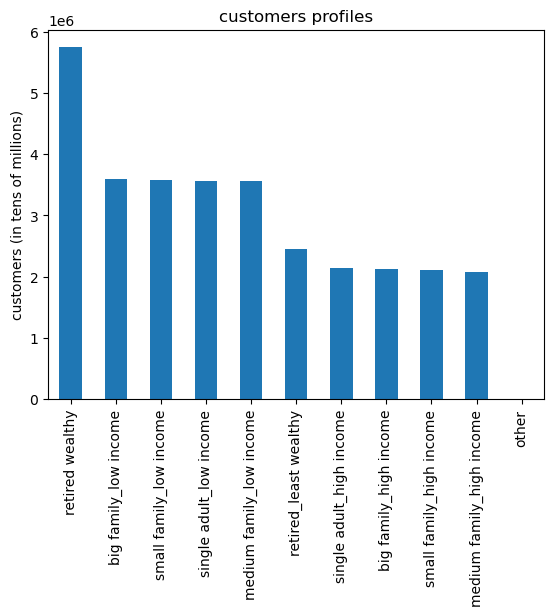

In [22]:
bar = df_instacart['customer_profile'].value_counts().plot.bar()
plt.ylabel("customers (in tens of millions)")
plt.title ("customers profiles")

In [23]:
#Save the bar chart of customer profile#
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'customers_profiles.png'), bbox_inches='tight')

# (7) Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [27]:
# aggregating min, max, mean of prices and avg_days_since_last_order for all profiles
df_instacart.groupby('customer_profile').agg({'prices': ['mean', 'min', 'max'], 'days_since_prior_order': ['mean', 'min', 'max']})

prices            days_since_prior_order       \
                               mean  min   max                   mean  min   
customer_profile                                                             
big family_high income     7.952499  1.0  25.0              10.837873  0.0   
big family_low income      7.699736  1.0  25.0              10.819609  0.0   
medium family_high income  7.956469  1.0  25.0              10.866973  0.0   
medium family_low income   7.680003  1.0  25.0              10.883109  0.0   
other                      7.956150  1.1  24.1               9.417074  1.0   
retired wealthy            7.955200  1.0  25.0              10.774731  0.0   
retired_least wealthy      7.425941  1.0  25.0              10.889757  0.0   
single adult_high income   7.948163  1.0  25.0              10.685417  0.0   
single adult_low income    7.687034  1.0  25.0              10.896386  0.0   
small family_high income   7.951992  1.0  25.0              10.800957  0.0   
small family_low income    7.698928  1.0  25.0              10.817945  0.0   

                                 
                            max  
customer_profile                 
big family_high income     30.0  
big family_low income      30.0  
medium family_high income  30.0  
medium family_low income   30.0  
other                      30.0  
retired wealthy            30.0  
retired_least wealthy      30.0  
single adult_high income   30.0  
single adult_low income    30.0  
small family_high income   30.0  
small family_low income    30.0

# Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.¶

In [29]:
# creating a crosstab to compare different profiles by region
crosstab_region = pd.crosstab(df_instacart['customer_profile'], df_instacart['region'], dropna = False)

In [30]:
crosstab_region

region,Midwest,Northeast,South,West
customer_profile,,,,
big family_high income,507972,379656,688647,551750
big family_low income,808919,630471,1215340,939011
medium family_high income,507510,369634,686094,507688
medium family_low income,819129,616816,1220448,912095
other,0,0,374,0
retired wealthy,1338228,1043604,1893622,1466309
retired_least wealthy,565818,441203,814839,631921
single adult_high income,527850,344487,719906,556653
single adult_low income,824885,631156,1204290,908496


([<matplotlib.axis.XTick at 0x2680270cc40>,
 [Text(0, 0, 'big family_\nhigh income '),
  Text(1, 0, 'big family_\nlow income '),
  Text(2, 0, 'medium family_\nhigh income '),
  Text(3, 0, 'medium family_\nlow income '),
  Text(4, 0, 'other'),
  Text(5, 0, 'retired\nwealthy '),
  Text(6, 0, 'retired_\nleast wealthy '),
  Text(7, 0, 'single adult_\nhigh income '),
  Text(8, 0, 'single adult_\nlow income'),
  Text(9, 0, 'small family_\nhigh income '),
  Text(10, 0, 'small family_\nlow income')])

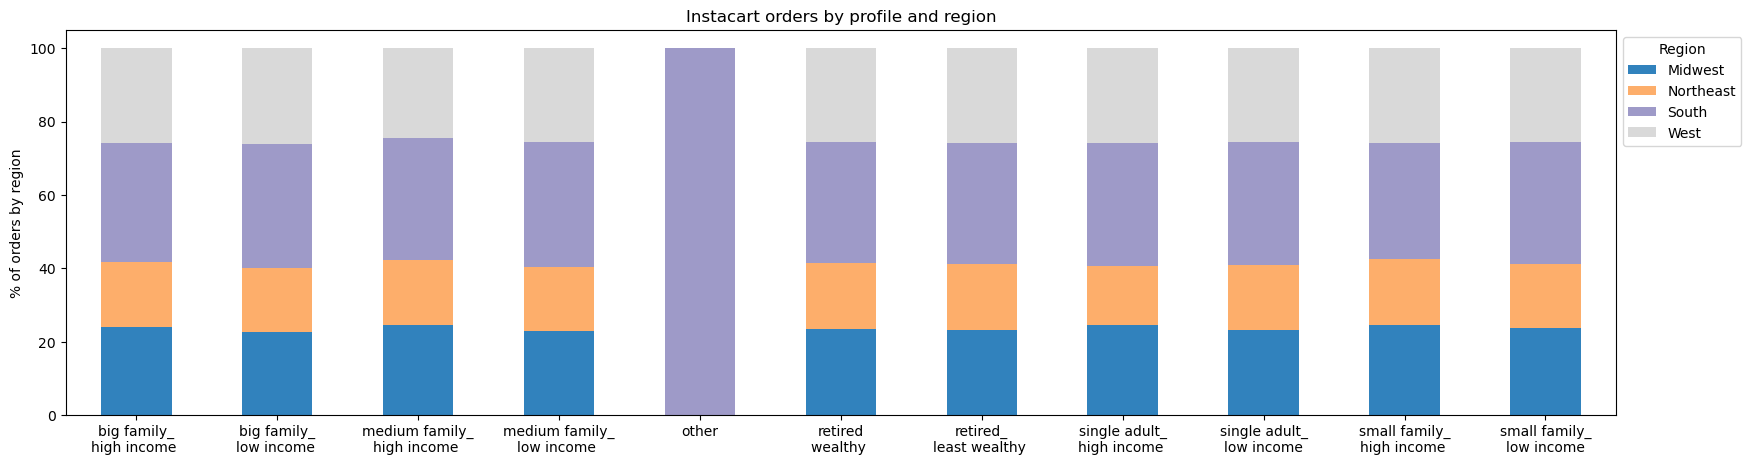

In [39]:
# Creating stacked bar graph to plot profile for regions
bar_profile_region = crosstab_region.loc[:,['Midwest','Northeast','South','West']].apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, rot=0, figsize=(20,5), colormap='tab20c').legend(title="Region", bbox_to_anchor=(1.0,1.0))
plt.xlabel("")
plt.ylabel("% of orders by region")
plt.title ("Instacart orders by profile and region")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10],['big family_\nhigh income ','big family_\nlow income ','medium family_\nhigh income ','medium family_\nlow income ','other','retired\nwealthy ','retired_\nleast wealthy ','single adult_\nhigh income ','single adult_\nlow income','small family_\nhigh income ', 'small family_\nlow income'])

In [40]:
bar_profile_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'profile_region.png'), bbox_inches='tight')

In [31]:
# creating a crosstab to compare different profiles by region
crosstab_department = pd.crosstab(df_instacart['customer_profile'], df_instacart['department_id'], dropna = False)

In [32]:
crosstab_department

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
customer_profile,,,,,,,,,,,,,,,,,,,,,
big family_high income,148269,2439,77995,635659,10908,17860,167832,7449,59156,1897,...,50414,124562,44223,72922,359813,48501,31748,164201,68441,4194
big family_low income,244405,3859,128238,1046157,17231,29096,302552,9224,94664,4163,...,75412,203976,79000,114729,595563,80781,45258,344338,117746,7906
medium family_high income,144982,2187,78502,608801,10332,17318,165516,5949,57340,2003,...,49473,123306,43485,71086,351215,47357,30698,160048,68210,4324
medium family_low income,243688,4052,126046,1036645,15231,28634,305532,10764,91173,4306,...,72916,200144,79934,112376,587672,81318,45878,351395,114405,7473
other,48,1,8,81,0,4,25,0,22,0,...,17,44,2,27,51,1,8,22,10,3
retired wealthy,399406,6312,211418,1719488,25756,48512,454001,18625,158994,5925,...,136237,338609,118771,195602,972729,128236,76986,449325,187730,11892
retired_least wealthy,164844,2634,84579,688616,10937,18687,230019,6490,58322,3020,...,44913,133774,56525,71907,395343,58394,29218,279224,77469,5023
single adult_high income,148591,2443,81833,640879,11729,18276,171446,6812,58966,2124,...,49043,126995,46057,72721,363356,47301,30385,166147,70775,4342
single adult_low income,239653,4116,127144,1039470,15959,29672,305253,10024,92034,3782,...,72504,201174,77889,113556,592220,79043,47051,343995,117239,7610


([<matplotlib.axis.XTick at 0x267aff3aee0>,
 [Text(0, 0, 'big family_\nhigh income '),
  Text(1, 0, 'big family_\nlow income '),
  Text(2, 0, 'medium family_\nhigh income '),
  Text(3, 0, 'medium family_\nlow income '),
  Text(4, 0, 'other'),
  Text(5, 0, 'retired\nwealthy '),
  Text(6, 0, 'retired_\nleast wealthy '),
  Text(7, 0, 'single adult_\nhigh income '),
  Text(8, 0, 'single adult_\nlow income'),
  Text(9, 0, 'small family_\nhigh income '),
  Text(10, 0, 'small family_\nlow income')])

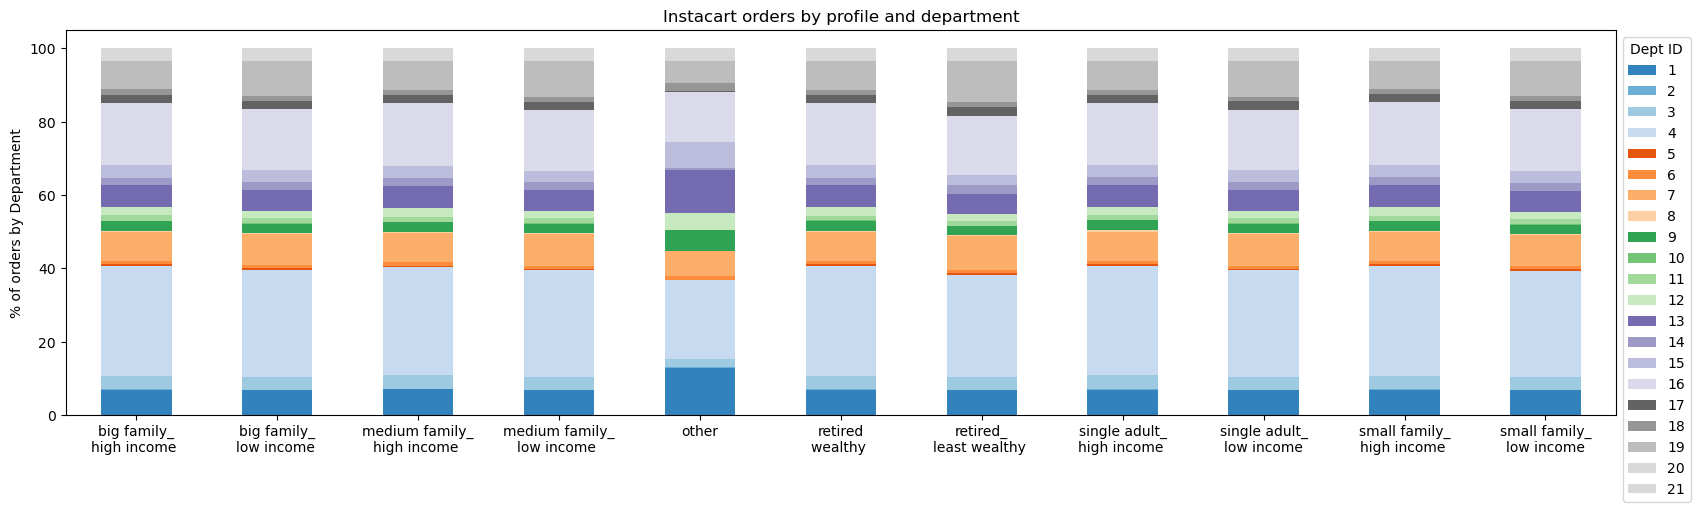

In [41]:
# Creating stacked bar to plot profile for regions
bar_profile_department = crosstab_department.loc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, rot=0, figsize=(20,5), colormap='tab20c').legend(title="Dept ID", bbox_to_anchor=(1.0,1.0))
plt.xlabel("")
plt.ylabel("% of orders by Department")
plt.title ("Instacart orders by profile and department")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10],['big family_\nhigh income ','big family_\nlow income ','medium family_\nhigh income ','medium family_\nlow income ','other','retired\nwealthy ','retired_\nleast wealthy ','single adult_\nhigh income ','single adult_\nlow income','small family_\nhigh income ', 'small family_\nlow income'])

In [42]:
df_instacart.shape

(30964564, 33)